In [2]:
import numpy as np
train_imgs_path = 'F:/SR/train_imgs.npy'
train_imgs = np.load(train_imgs_path)

In [3]:
train_imgs.shape

(219, 6, 1640, 1640)

In [4]:
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt

root = Path('F:\SR')
assert root.exists()

train_imgs = list((root/'lake_MODIS').glob('*.tif'))
train_tars = list((root/'lake_Landsat').glob('*.tif'))

In [5]:
import rioxarray as rxr
for i in range(len(train_imgs)):
    img = rxr.open_rasterio(train_imgs[i])
    print(img.shape)

(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)
(6, 1233, 2004)


In [10]:
from pathlib import Path
import rioxarray as rxr
import numpy as np
from scipy.ndimage import distance_transform_edt

def fill_nan_with_zero(img_array):
    """
    Fill all NaN values with zero.
    """
    return np.nan_to_num(img_array, nan=0.0)

# Root directory containing training data
root = Path('F:/SR')
assert root.exists()

# Get the list of input image paths
train_imgs = list((root / 'lake_Landsat').glob('*.tif'))

# Initialize the output array
output_array = np.zeros((len(train_imgs), 6, 1200, 2000), dtype=np.float32)

# Process each image
for idx, img_path in enumerate(train_imgs):
    # Open the image
    img = rxr.open_rasterio(img_path).values  # Shape: (6, H, W)
    
    # Handle NaN values using nearest valid pixel
    img = fill_nan_with_zero(img)
    
    # Crop to the desired size
    img_cropped = img[:, :1200, :2000]  # Shape: (6, 1200, 2000)
    
    # Store in the output array
    output_array[idx] = img_cropped

# Save the result to a .npy file
output_file = root / 'processed_tars_images.npy'
np.save(output_file, output_array)

# Check for NaN in the output array
if np.isnan(output_array).any():
    print("Warning: output_array still contains NaN values!")
else:
    print(f"Processed images saved to {output_file}, and no NaN values remain.")


Processed images saved to F:\SR\processed_tars_images.npy, and no NaN values remain.


In [ ]:
output_array

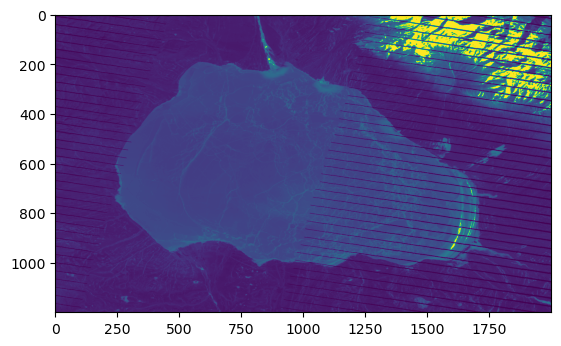

In [12]:
plt.imshow(output_array[0, 0])

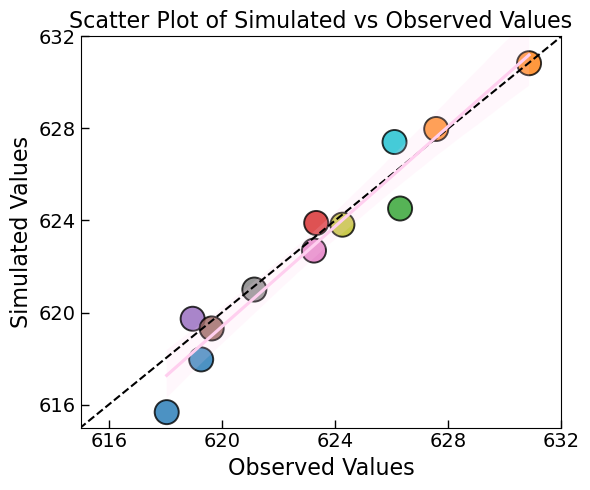

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
data = pd.read_csv('../data/sim_vs_obs.csv')
# Initialize the plot
plt.figure(figsize=(6, 5))

# Scatter plot: Different colors for each month
scatter = sns.scatterplot(
    data=data, x='obs', y='sim', hue='mon', palette='tab10', s=300, edgecolor='k', alpha=0.8
)

# Add 1:1 line
min_val = min(data['obs'].min() - 5, data['sim'].min() - 5)
max_val = max(data['obs'].max() + 5, data['sim'].max() + 5)
plt.plot([min_val, max_val], [min_val, max_val], '--', color='black')

# Fit and plot regression line
sns.regplot(
    data=data, x='obs', y='sim', scatter=False, color='#FFCFEF', line_kws={'label': 'Fit Line'}
)

# Customize the plot
plt.xlabel('Observed Values', fontsize=16)
plt.ylabel('Simulated Values', fontsize=16)
plt.title('Scatter Plot of Simulated vs Observed Values', fontsize=16)
plt.xlim(615, 632)
plt.ylim(615, 632)
plt.grid(False)

# Adjust tick parameters to make ticks point inward
plt.tick_params(axis='both', direction='in', length=6, width=1, labelsize=14)
plt.xticks(ticks=np.arange(616, 633, 4))
plt.yticks(ticks=np.arange(616, 633, 4))

# Remove legend
plt.legend([],[], frameon=False)

# Show the plot
plt.tight_layout()
plt.show()

